In [1]:
import yfinance as yf, numpy as np, datetime as dt, matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
tickers = ['INFY.BO','ONGC.BO','SBIN.BO','TCS.BO','RELIANCE.BO','NTPC.BO','LT.BO','HDFCBANK.BO', 'ICICIBANK.BO', 'ITC.BO']
weights = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [3]:
start = dt.datetime(2019,1,1)
end = dt.datetime.now()

In [5]:
df = yf.download(tickers, start, end)['Adj Close']
df

[*********************100%%**********************]  10 of 10 completed


,HDFCBANK.BO,ICICIBANK.BO,INFY.BO,ITC.BO,LT.BO,NTPC.BO,ONGC.BO,RELIANCE.BO,SBIN.BO,TCS.BO
Date,,,,,,,,,,
2019-01-01,1061.554199,358.531921,647.456116,282.850006,1423.520996,117.633095,140.486450,1114.047607,293.644257,1836.796875
2019-01-02,1050.926025,359.222076,651.985779,280.500000,1408.365112,116.284637,139.213165,1099.095703,288.249084,1856.880127
2019-01-03,1044.153687,358.137573,650.281067,278.899994,1376.325317,113.746361,135.063156,1084.640381,285.502441,1831.100098
2019-01-04,1046.872559,360.405151,643.656921,280.750000,1371.734131,115.531082,137.373947,1091.892822,291.829498,1809.375366
2019-01-07,1047.984741,362.327728,653.787903,281.750000,1366.451660,117.712418,139.166000,1096.264160,290.063812,1831.293335
...,...,...,...,...,...,...,...,...,...,...
2024-01-10,1656.000000,993.049988,1519.650024,463.200012,3547.050049,313.350006,212.100006,2649.949951,621.700012,3713.699951
2024-01-11,1649.000000,990.950012,1495.000000,462.600006,3505.199951,312.899994,211.750000,2718.399902,620.299988,3736.199951
2024-01-12,1639.550049,1003.849976,1612.199951,466.600006,3565.949951,312.649994,223.350006,2740.100098,633.750000,3881.699951


In [6]:
returns = df.pct_change()

In [7]:
returns

,HDFCBANK.BO,ICICIBANK.BO,INFY.BO,ITC.BO,LT.BO,NTPC.BO,ONGC.BO,RELIANCE.BO,SBIN.BO,TCS.BO
Date,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.010012,0.001925,0.006996,-0.008308,-0.010647,-0.011463,-0.009063,-0.013421,-0.018373,0.010934
2019-01-03,-0.006444,-0.003019,-0.002615,-0.005704,-0.022750,-0.021828,-0.029810,-0.013152,-0.009529,-0.013884
2019-01-04,0.002604,0.006332,-0.010187,0.006633,-0.003336,0.015690,0.017109,0.006686,0.022161,-0.011864
2019-01-07,0.001062,0.005334,0.015740,0.003562,-0.003851,0.018881,0.013045,0.004003,-0.006050,0.012114
...,...,...,...,...,...,...,...,...,...,...
2024-01-10,0.003393,0.014041,-0.006213,-0.002477,-0.002054,-0.020322,-0.021002,0.026874,-0.005916,0.006382
2024-01-11,-0.004227,-0.002115,-0.016221,-0.001295,-0.011799,-0.001436,-0.001650,0.025831,-0.002252,0.006059
2024-01-12,-0.005731,0.013018,0.078395,0.008647,0.017331,-0.000799,0.054782,0.007983,0.021683,0.038943


In [8]:
cov_matrix =returns.cov()
cov_matrix

,HDFCBANK.BO,ICICIBANK.BO,INFY.BO,ITC.BO,LT.BO,NTPC.BO,ONGC.BO,RELIANCE.BO,SBIN.BO,TCS.BO
HDFCBANK.BO,0.000287,0.000226,0.000103,0.000085,0.000159,0.000082,0.000091,0.000139,0.000192,0.000081
ICICIBANK.BO,0.000226,0.000433,0.000120,0.000115,0.000204,0.000118,0.000173,0.000163,0.000303,0.000097
INFY.BO,0.000103,0.000120,0.000339,0.000061,0.000098,0.000066,0.000106,0.000114,0.000098,0.000187
ITC.BO,0.000085,0.000115,0.000061,0.000274,0.000109,0.000087,0.000130,0.000085,0.000145,0.000056
LT.BO,0.000159,0.000204,0.000098,0.000109,0.000315,0.000120,0.000147,0.000123,0.000205,0.000082
NTPC.BO,0.000082,0.000118,0.000066,0.000087,0.000120,0.000321,0.000199,0.000088,0.000149,0.000054
ONGC.BO,0.000091,0.000173,0.000106,0.000130,0.000147,0.000199,0.000567,0.000169,0.000193,0.000102
RELIANCE.BO,0.000139,0.000163,0.000114,0.000085,0.000123,0.000088,0.000169,0.000375,0.000160,0.000110
SBIN.BO,0.000192,0.000303,0.000098,0.000145,0.000205,0.000149,0.000193,0.000160,0.000462,0.000084
TCS.BO,0.000081,0.000097,0.000187,0.000056,0.000082,0.000054,0.000102,0.000110,0.000084,0.000250


In [9]:
avg_returns = returns.mean()
avg_returns

HDFCBANK.BO     0.000517
ICICIBANK.BO    0.001061
INFY.BO         0.000923
ITC.BO          0.000555
LT.BO           0.000909
NTPC.BO         0.000954
ONGC.BO         0.000704
RELIANCE.BO     0.000923
SBIN.BO         0.000862
TCS.BO          0.000730
dtype: float64

In [11]:
count = returns.count()[0]
count

1227

In [12]:
port_mean = avg_returns @ weights
port_std = np.sqrt(weights.T @ cov_matrix @ weights)

In [13]:
port_mean

0.00081388894923096

In [14]:
port_std

0.012319383652987329

In [19]:
x = np.arange(-0.06,0.06,0.001)
norm_dist = norm.pdf(x, port_mean, port_std)
norm_dist

array([1.65494368e-04, 2.46250101e-04, 3.64005575e-04, 5.34537367e-04,
       7.79805910e-04, 1.13014298e-03, 1.62711660e-03, 2.32724646e-03,
       3.30677388e-03, 4.66772256e-03, 6.54551750e-03, 9.11845709e-03,
       1.26193547e-02, 1.73496753e-02, 2.36964873e-02, 3.21525195e-02,
       4.33395568e-02, 5.80353139e-02, 7.72037912e-02, 1.02028930e-01,
       1.33951153e-01, 1.74706071e-01, 2.26364310e-01, 2.91371003e-01,
       3.72583072e-01, 4.73301987e-01, 5.97299227e-01, 7.48831310e-01,
       9.32640893e-01, 1.15394027e+00, 1.41837355e+00, 1.73195392e+00,
       2.10097295e+00, 2.53187933e+00, 3.03112583e+00, 3.60498401e+00,
       4.25932851e+00, 4.99939382e+00, 5.82950901e+00, 6.75281767e+00,
       7.77099245e+00, 8.88395534e+00, 1.00896166e+01, 1.13836459e+01,
       1.27592900e+01, 1.42072511e+01, 1.57156381e+01, 1.72700025e+01,
       1.88534659e+01, 2.04469444e+01, 2.20294700e+01, 2.35786045e+01,
       2.50709369e+01, 2.64826504e+01, 2.77901409e+01, 2.89706651e+01,
      

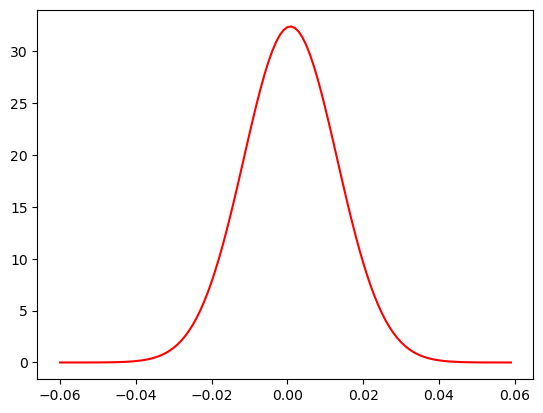

In [20]:
plt.plot (x, norm_dist, color = 'r')
plt.show()

In [21]:
confidence_level = 0.05
VaR = norm.pdf(confidence_level, port_mean, port_std)
VaR

0.011190386025221237

In [22]:
# VaR for 5 days

num_days = 5
VaR * np.sqrt(num_days)

0.025022463846858363

In [23]:
lower = port_mean - 1.96 * port_std/np.sqrt(count)
higher = port_mean + 1.96 * port_std/np.sqrt(count)

In [24]:
lower

0.00012456594782654466

In [25]:
higher

0.0015032119506353755